# Metoda celor mai apropiați k-vecini


### Importuri necesare

In [105]:
import numpy as np
import matplotlib.pyplot as plt

### Calea catre date

In [106]:
dataPath = "data/"

### Incarcare date train

In [107]:
train_images = np.loadtxt(dataPath + "train_images.txt")
train_labels = np.loadtxt(dataPath + "train_labels.txt", 'int8')

print(train_images.shape)
print(train_images.ndim)
print(type(train_images[0, 0]))
print(train_images.size)
print(train_images.nbytes)


(1000, 784)
2
<class 'numpy.float64'>
784000
6272000


C:\Users\lmg\AppData\Local\Temp\ipykernel_15008\3906387298.py:2: DeprecationWarning: loadtxt(): Parsing an integer via a float is deprecated.  To avoid this warning, you can:
    * make sure the original data is stored as integers.
    * use the `converters=` keyword argument.  If you only use
      NumPy 1.23 or later, `converters=float` will normally work.
    * Use `np.loadtxt(...).astype(np.int64)` parsing the file as
      floating point and then convert it.  (On all NumPy versions.)
  (Deprecated NumPy 1.23)
  train_labels = np.loadtxt(dataPath + "train_labels.txt", 'int8')


### Plotare date train

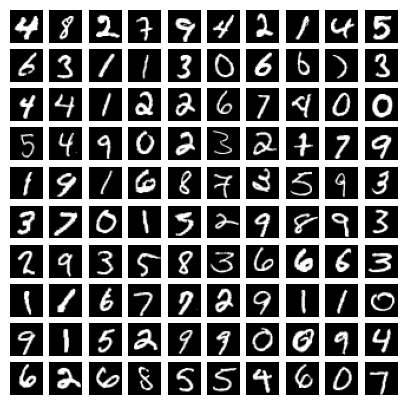

[[4 8 2 7 9 4 2 1 4 5]
 [6 3 1 1 3 0 6 6 7 3]
 [4 4 1 2 2 6 7 4 0 0]
 [5 4 9 0 2 3 2 7 7 9]
 [1 9 1 6 8 7 3 5 9 3]
 [3 7 0 1 3 2 9 8 9 3]
 [2 9 3 5 8 3 6 6 6 3]
 [1 1 6 7 7 2 9 1 1 0]
 [9 1 5 2 9 9 0 0 9 4]
 [6 2 6 8 5 5 4 6 0 7]]


In [108]:
nbImages = 10
plt.figure(figsize=(5,5))
for i in range(nbImages**2):
    plt.subplot(nbImages,nbImages,i+1)
    plt.axis('off')
    plt.imshow(np.reshape(train_images[i,:],(28,28)),cmap = "gray")
plt.show()
labels_nbImages = train_labels[:nbImages**2]
print(np.reshape(labels_nbImages,(nbImages,nbImages)))

### Incarcare date test

In [109]:
test_images = np.loadtxt(dataPath + "test_images.txt")
test_labels = np.loadtxt(dataPath + "test_labels.txt", "int8")


print(test_images.shape)
print(test_images.ndim)
print(type(test_images[0, 0]))
print(test_images.size)
print(test_images.nbytes)


(500, 784)
2
<class 'numpy.float64'>
392000
3136000


C:\Users\lmg\AppData\Local\Temp\ipykernel_15008\1542767767.py:2: DeprecationWarning: loadtxt(): Parsing an integer via a float is deprecated.  To avoid this warning, you can:
    * make sure the original data is stored as integers.
    * use the `converters=` keyword argument.  If you only use
      NumPy 1.23 or later, `converters=float` will normally work.
    * Use `np.loadtxt(...).astype(np.int64)` parsing the file as
      floating point and then convert it.  (On all NumPy versions.)
  (Deprecated NumPy 1.23)
  test_labels = np.loadtxt(dataPath + "test_labels.txt", "int8")


### Plotare date test

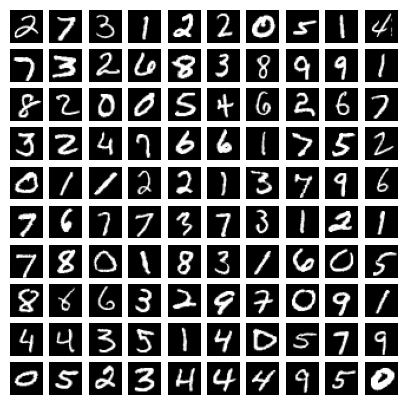

[[2 7 3 1 2 2 0 5 1 4]
 [7 3 2 6 8 3 8 9 9 1]
 [8 2 0 0 5 4 6 2 6 7]
 [3 2 4 7 6 6 1 7 5 2]
 [0 1 1 2 2 1 3 7 9 6]
 [7 6 7 7 3 7 3 1 2 1]
 [7 8 0 1 8 3 1 6 0 5]
 [8 6 6 3 2 9 7 0 9 1]
 [4 4 3 5 1 4 0 5 7 9]
 [0 5 2 3 4 4 4 9 5 0]]


In [110]:
nbImages = 10
plt.figure(figsize=(5,5))
for i in range(nbImages**2):
    plt.subplot(nbImages,nbImages,i+1)
    plt.axis('off')
    plt.imshow(np.reshape(test_images[i,:],(28,28)),cmap = "gray")
plt.show()
labels_nbImages = test_labels[:nbImages**2]
print(np.reshape(labels_nbImages,(nbImages,nbImages)))

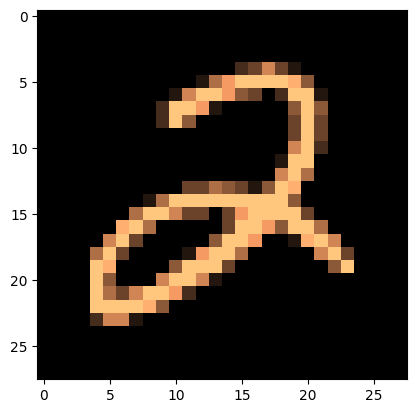

In [111]:
img = test_images[0,]
plt.imshow(np.reshape(img,(28,28)), cmap = "copper")
plt.show()

In [112]:

distances = np.sqrt((train_images - img)**2).sum(axis=1)
indices=distances.argsort()
# k = [1,3,5,7,9,11]
# labels_knn = [train_labels[indices[:i]] for i in k]
# for label in labels_knn:
#     count = np.bincount(label)
#     print(count.argmax())

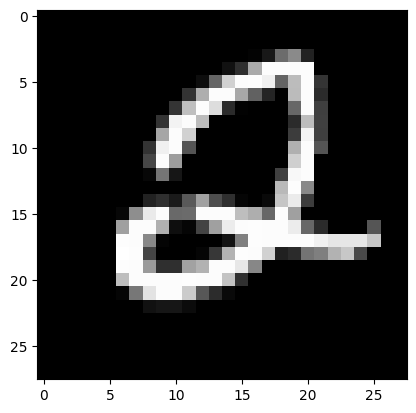

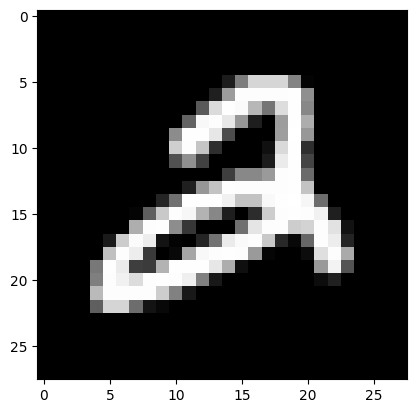

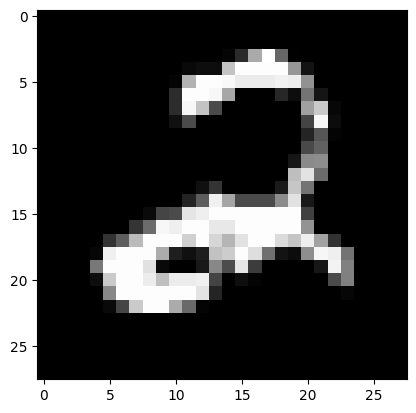

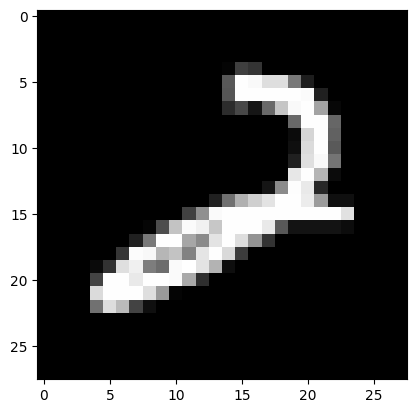

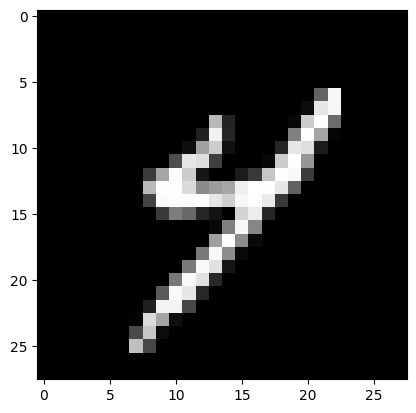

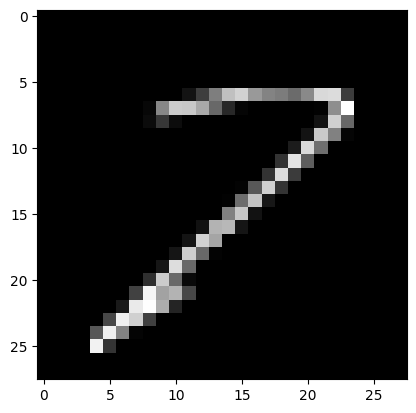

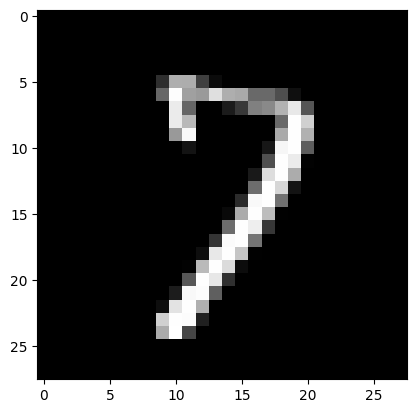

In [113]:
x = indices[:7]
for i in range(7):
    plt.imshow(np.reshape(train_images[x[i]], (28, 28)), cmap="gray")
    plt.show()

In [123]:
def classify_image(train_images, train_labes, test_image, num_neighbors=3, metric='l2'):
    if metric == "l2":
        distances = np.sqrt(((train_images - test_image)**2).sum(axis=1))
    elif metric == "l1":
        distances = abs(train_images - test_image).sum(axis=1)
    else:
        raise ValueError("error")
    indices = distances.argsort()
    labels_knn = train_labels[indices[:num_neighbors]]
    count = np.bincount(labels_knn)
    return count.argmax()

In [115]:
predicted_labels = np.zeros(len(test_labels))
for i in range(len(test_labels)):
    predicted_labels[i] = classify_image(train_images, train_labels, test_images[i])

In [116]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_labels, predicted_labels))

0.898


In [117]:
def confusion_matrix(y_true, y_pred):
    C = np.zeros((10,10), 'int8')
    for i in range(len(y_true)):
        C[int(y_true[i]), int(y_pred[i])] += 1
    return C

print(confusion_matrix(test_labels, predicted_labels))

from sklearn import metrics

print(metrics.confusion_matrix(test_labels, predicted_labels))

[[51  0  0  0  0  1  1  0  0  0]
 [ 0 52  0  0  0  0  0  0  0  0]
 [ 1  6 47  1  0  0  1  2  0  0]
 [ 0  0  0 51  0  1  0  0  0  1]
 [ 0  0  0  0 44  0  0  0  0  2]
 [ 2  1  1  6  0 40  1  0  0  1]
 [ 0  0  0  0  0  1 47  0  0  0]
 [ 1  2  0  0  1  0  0 46  0  0]
 [ 1  0  2  2  1  1  1  1 36  1]
 [ 0  0  1  1  3  1  0  1  0 35]]
[[51  0  0  0  0  1  1  0  0  0]
 [ 0 52  0  0  0  0  0  0  0  0]
 [ 1  6 47  1  0  0  1  2  0  0]
 [ 0  0  0 51  0  1  0  0  0  1]
 [ 0  0  0  0 44  0  0  0  0  2]
 [ 2  1  1  6  0 40  1  0  0  1]
 [ 0  0  0  0  0  1 47  0  0  0]
 [ 1  2  0  0  1  0  0 46  0  0]
 [ 1  0  2  2  1  1  1  1 36  1]
 [ 0  0  1  1  3  1  0  1  0 35]]


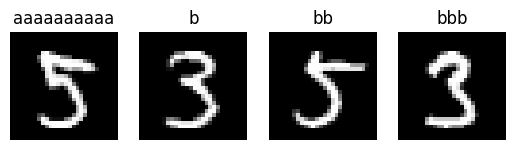

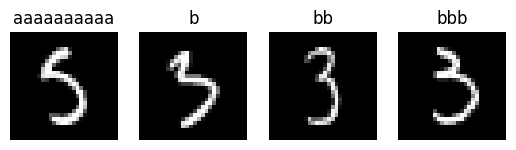

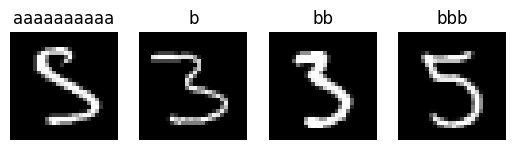

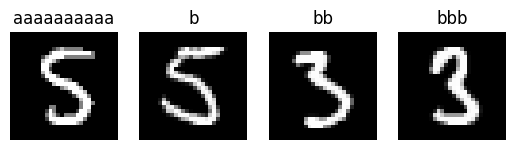

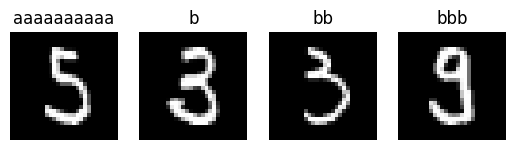

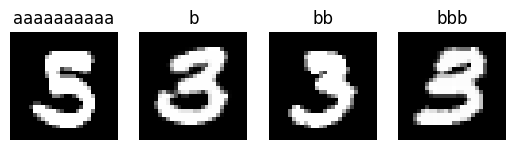

In [118]:
for i in range(len(test_labels)):
    if test_labels[i] == 5 and predicted_labels[i] == 3:
        cnt = 1
        img = test_images[i, :]
        plt.subplot(1, 4, cnt)
        plt.axis('off')
        plt.title("aaaaaaaaaa")
        plt.imshow(np.reshape(img, (28, 28)), cmap="gray")
        distances = np.sqrt(((train_images - img)**2).sum(axis=1))
        indices = distances.argsort()
        knn = indices[:3]
        for j in range(3):
            cnt += 1
            plt.subplot(1, 4, cnt)
            plt.axis('off')
            plt.title("b" * (j+1))
            plt.imshow(np.reshape(train_images[knn[j]], (28, 28)), cmap="gray")
        plt.show()


In [132]:
k = [i for i in range(100) if i % 2]
print(k)
accuracy_l1 = np.zeros(len(k))
accuracy_l2 = np.zeros(len(k))
predicted_labels_l1 = np.zeros(len(test_images))
predicted_labels_l2 = np.zeros(len(test_images))


for i, c in enumerate(k):
    for j, l in enumerate(test_images):
        predicted_labels_l1[j] = classify_image(train_images, train_labels, test_images[j], c, "l1")
        predicted_labels_l2[j] = classify_image(train_images, train_labels, test_images[j], c, "l2")
    accuracy_l1[i] = accuracy_score(test_labels, predicted_labels_l1)
    accuracy_l2[i] = accuracy_score(test_labels, predicted_labels_l2)

print(accuracy_l1)
print(accuracy_l2)


[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]
[0.88  0.884 0.868 0.864 0.864 0.856 0.854 0.844 0.836 0.828 0.82  0.804
 0.786 0.792 0.778 0.768 0.774 0.768 0.766 0.76  0.76  0.754 0.75  0.736
 0.728 0.74  0.74  0.736 0.73  0.728 0.722 0.714 0.706 0.708 0.708 0.706
 0.706 0.698 0.694 0.69  0.692 0.692 0.684 0.69  0.68  0.684 0.68  0.682
 0.678 0.674]
[0.884 0.898 0.896 0.88  0.88  0.872 0.86  0.862 0.846 0.85  0.824 0.824
 0.824 0.812 0.81  0.804 0.81  0.806 0.794 0.788 0.782 0.778 0.764 0.766
 0.764 0.756 0.752 0.75  0.742 0.746 0.744 0.74  0.746 0.74  0.74  0.74
 0.732 0.734 0.718 0.722 0.724 0.722 0.718 0.718 0.718 0.714 0.712 0.71
 0.706 0.702]


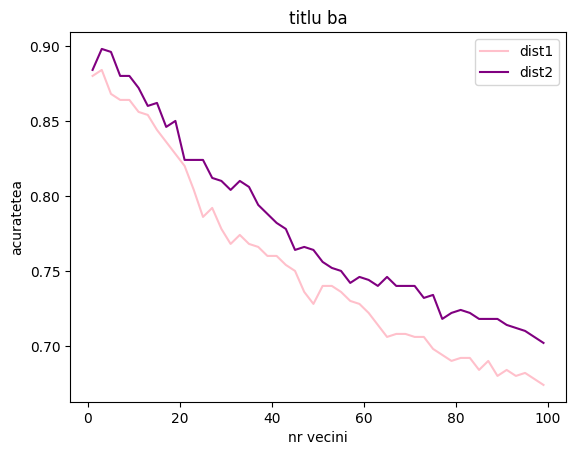

In [133]:
plt.plot(k, accuracy_l1, "pink")
plt.plot(k, accuracy_l2, "purple")
plt.title("titlu ba")
plt.xlabel("nr vecini")
plt.ylabel("acuratetea")
plt.legend(("dist1", "dist2"))
plt.show()

In [164]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(train_images, train_labels)

pred_labels2 = neigh.predict(test_images)
print(accuracy_score(test_labels, pred_labels2))


0.896
